In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv
import scipy
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

In [2]:
address = '~/Downloads/iris1.csv'
iris1 = pd.read_csv(address)
iris1.head(10)

,refId,appContext,clicked,imported,replied,opened,openedInEmailClient,openedInInbox
0,10000080-21333,InboxWebapp/sendMessage,0,1,0,1,1,0
1,10001075-2742,InboxWebapp/sendMessage,0,1,0,1,1,0
2,10001341-377,InboxWebapp/sendMessage,0,2,1,0,0,0
3,10001929-10205,InboxWebapp/sendMessage,0,4,4,0,0,0
4,10002418-441,InboxWebapp/sendMessage,0,4,4,4,4,0
5,10000046-121,application-email,0,1,0,1,1,0
6,10000061-1000,application-email,0,1,0,0,0,0
7,10000061-1001,application-email,0,5,0,5,5,0
8,10000061-1008,application-email,0,3,1,3,3,0
9,10000061-855,application-email,0,1,0,1,1,0


In [4]:
iris1.isnull().any()

refId                  False
appContext             False
clicked                False
imported               False
replied                False
opened                 False
openedInEmailClient    False
openedInInbox          False
dtype: bool

In [5]:
iris1.groupby('appContext').describe()

clicked                                          \
                              count      mean       std  min  25%  50%  75%   
appContext                                                                    
InboxWebapp/sendMessage         5.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
application-email            1109.0  0.001803  0.042448  0.0  0.0  0.0  0.0   
bulk-dradis-send               14.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
bulk-dradis-send-template      19.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
dradis-reply                   60.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
dradis-send                   568.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
interview-email              1895.0  0.016887  0.128880  0.0  0.0  0.0  0.0   
mobile-send                     3.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
rejection-letter              457.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
single-dradis-send            375.0  0.008000  0.089203  0.0  0.0  0.0  0.0   
single-dradis-send-template   346.0  0.020231  0.140994  0.0  0.0  0.0  0.0   

                                 imported           ...  openedInInbox       \
                             max    count      mean ...            75%  max   
appContext                                          ...                       
InboxWebapp/sendMessage      0.0      5.0  2.400000 ...            0.0  0.0   
application-email            1.0   1109.0  1.281335 ...            0.0  0.0   
bulk-dradis-send             0.0     14.0  0.000000 ...            0.0  0.0   
bulk-dradis-send-template    0.0     19.0  0.000000 ...            0.0  0.0   
dradis-reply                 0.0     60.0  0.250000 ...            0.0  0.0   
dradis-send                  0.0    568.0  0.068662 ...            0.0  0.0   
interview-email              1.0   1895.0  0.007916 ...            0.0  0.0   
mobile-send                  0.0      3.0  0.666667 ...            0.0  0.0   
rejection-letter             0.0    457.0  0.002188 ...            0.0  0.0   
single-dradis-send           1.0    375.0  0.216000 ...            0.0  0.0   
single-dradis-send-template  1.0    346.0  0.254335 ...            0.0  0.0   

                            replied                                          \
                              count      mean       std  min  25%  50%  75%   
appContext                                                                    
InboxWebapp/sendMessage         5.0  1.800000  2.049390  0.0  0.0  1.0  4.0   
application-email            1109.0  0.294860  0.810903  0.0  0.0  0.0  0.0   
bulk-dradis-send               14.0  0.142857  0.363137  0.0  0.0  0.0  0.0   
bulk-dradis-send-template      19.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
dradis-reply                   60.0  1.083333  1.898185  0.0  0.0  0.0  1.0   
dradis-send                   568.0  0.126761  0.425951  0.0  0.0  0.0  0.0   
interview-email              1895.0  0.044327  0.218322  0.0  0.0  0.0  0.0   
mobile-send                     3.0  1.333333  0.577350  1.0  1.0  1.0  1.5   
rejection-letter              457.0  0.024070  0.153435  0.0  0.0  0.0  0.0   
single-dradis-send            375.0  0.496000  0.807293  0.0  0.0  0.0  1.0   
single-dradis-send-template   346.0  0.404624  0.775256  0.0  0.0  0.0  1.0   

                                  
                             max  
appContext                        
InboxWebapp/sendMessage      4.0  
application-email            8.0  
bulk-dradis-send             1.0  
bulk-dradis-send-template    0.0  
dradis-reply                 8.0  
dradis-send                  4.0  
interview-email              2.0  
mobile-send                  2.0  
rejection-letter             1.0  
single-dradis-send           6.0  
single-dradis-send-template  7.0  

[11 rows x 48 columns]

In [11]:
#R Correlation
pearsonr_coefficient, p_value = pearsonr(iris1.clicked, iris1.imported)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient -0.032


In [12]:
#R Correlation
pearsonr_coefficient, p_value = pearsonr(iris1.clicked, iris1.replied)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient -0.015


In [13]:
#R Correlation
pearsonr_coefficient, p_value = pearsonr(iris1.clicked, iris1.opened)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.055


In [14]:
#R Correlation
pearsonr_coefficient, p_value = pearsonr(iris1.replied, iris1.opened)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.523


In [15]:
#R Correlation
pearsonr_coefficient, p_value = pearsonr(iris1.replied, iris1.imported)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.557


In [17]:
#R Correlation
pearsonr_coefficient, p_value = pearsonr(iris1.imported, iris1.opened)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.478


In [20]:
#Chi2
table = pd.crosstab(iris1.appContext, iris1.replied)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 1047.506 p_value 0.000


In [27]:
iris2 = pd.get_dummies(iris1['appContext'])

In [28]:
iris2.head(20)

,InboxWebapp/sendMessage,application-email,bulk-dradis-send,bulk-dradis-send-template,dradis-reply,dradis-send,interview-email,mobile-send,rejection-letter,single-dradis-send,single-dradis-send-template
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0


In [29]:
iris3 = pd.concat([iris1, iris2], axis=1)
iris3.head(20)

,refId,appContext,clicked,imported,replied,opened,openedInEmailClient,openedInInbox,InboxWebapp/sendMessage,application-email,bulk-dradis-send,bulk-dradis-send-template,dradis-reply,dradis-send,interview-email,mobile-send,rejection-letter,single-dradis-send,single-dradis-send-template
0,10000080-21333,InboxWebapp/sendMessage,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1,10001075-2742,InboxWebapp/sendMessage,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,10001341-377,InboxWebapp/sendMessage,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,10001929-10205,InboxWebapp/sendMessage,0,4,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,10002418-441,InboxWebapp/sendMessage,0,4,4,4,4,0,1,0,0,0,0,0,0,0,0,0,0
5,10000046-121,application-email,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
6,10000061-1000,application-email,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,10000061-1001,application-email,0,5,0,5,5,0,0,1,0,0,0,0,0,0,0,0,0
8,10000061-1008,application-email,0,3,1,3,3,0,0,1,0,0,0,0,0,0,0,0,0
9,10000061-855,application-email,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0


In [79]:
iris_trim = iris3[['clicked', 'imported', 'replied', 'opened', 'InboxWebapp/sendMessage', 'application-email', 'bulk-dradis-send', 'bulk-dradis-send-template', 'dradis-reply', 'dradis-send', 'interview-email', 'mobile-send', 'rejection-letter', 'single-dradis-send', 'single-dradis-send-template']]

In [80]:
iris_trim.head(20)

,clicked,imported,replied,opened,InboxWebapp/sendMessage,application-email,bulk-dradis-send,bulk-dradis-send-template,dradis-reply,dradis-send,interview-email,mobile-send,rejection-letter,single-dradis-send,single-dradis-send-template
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,4,4,0,1,0,0,0,0,0,0,0,0,0,0
4,0,4,4,4,1,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,5,0,5,0,1,0,0,0,0,0,0,0,0,0
8,0,3,1,3,0,1,0,0,0,0,0,0,0,0,0
9,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0


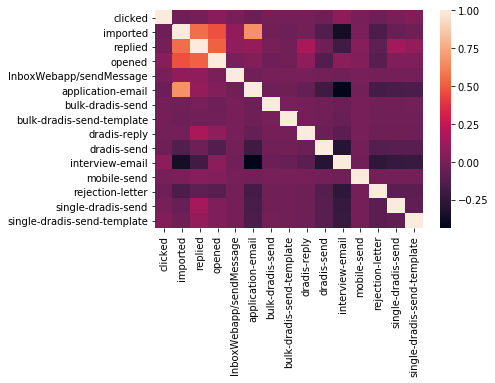

In [90]:
#Correlation heat map#Correl 
X = iris_trim
corr = X.corr()
corr
sb.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

Text(0.5,1,'Replied by Opened')

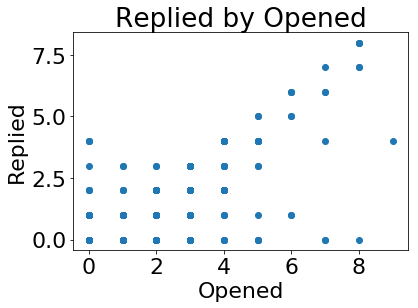

In [103]:
opened = plt.scatter(iris_trim.opened, iris_trim.replied)
plt.xlabel("Opened")
plt.ylabel("Replied")
plt.title("Replied by Opened")

Text(0.5,1,'Replied by Imported')

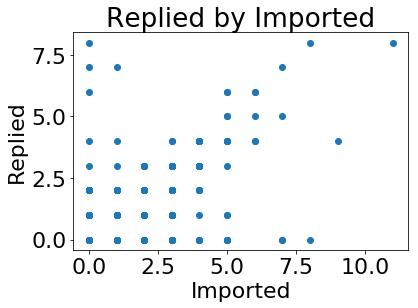

In [104]:
imported = plt.scatter(iris_trim.imported, iris_trim.replied)
plt.xlabel("Imported")
plt.ylabel("Replied")
plt.title("Replied by Imported")

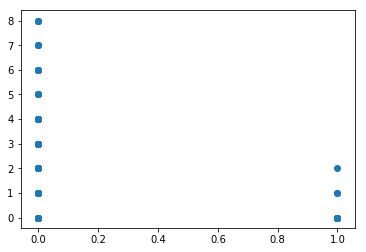

In [94]:
plt.scatter(iris_trim.clicked, iris_trim.replied)

<Figure size 216x288 with 0 Axes>

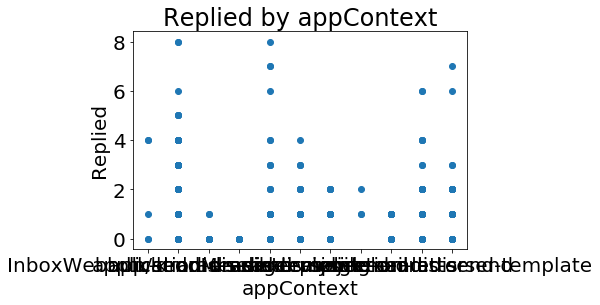

<Figure size 216x288 with 0 Axes>

In [114]:
appContextplt = plt.scatter(iris3.appContext, iris3.replied)
plt.xlabel("appContext")
plt.ylabel("Replied")
plt.title("Replied by appContext")
plt.figure(figsize=(3,4))

In [118]:
fig_size= plt.rcParams["figure.figsize"]
print("Current size:", fig_size)

Current size: [6.0, 4.0]


In [127]:
fig_size[0] = 24
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

Text(0.5,1,'Replied by appContext')

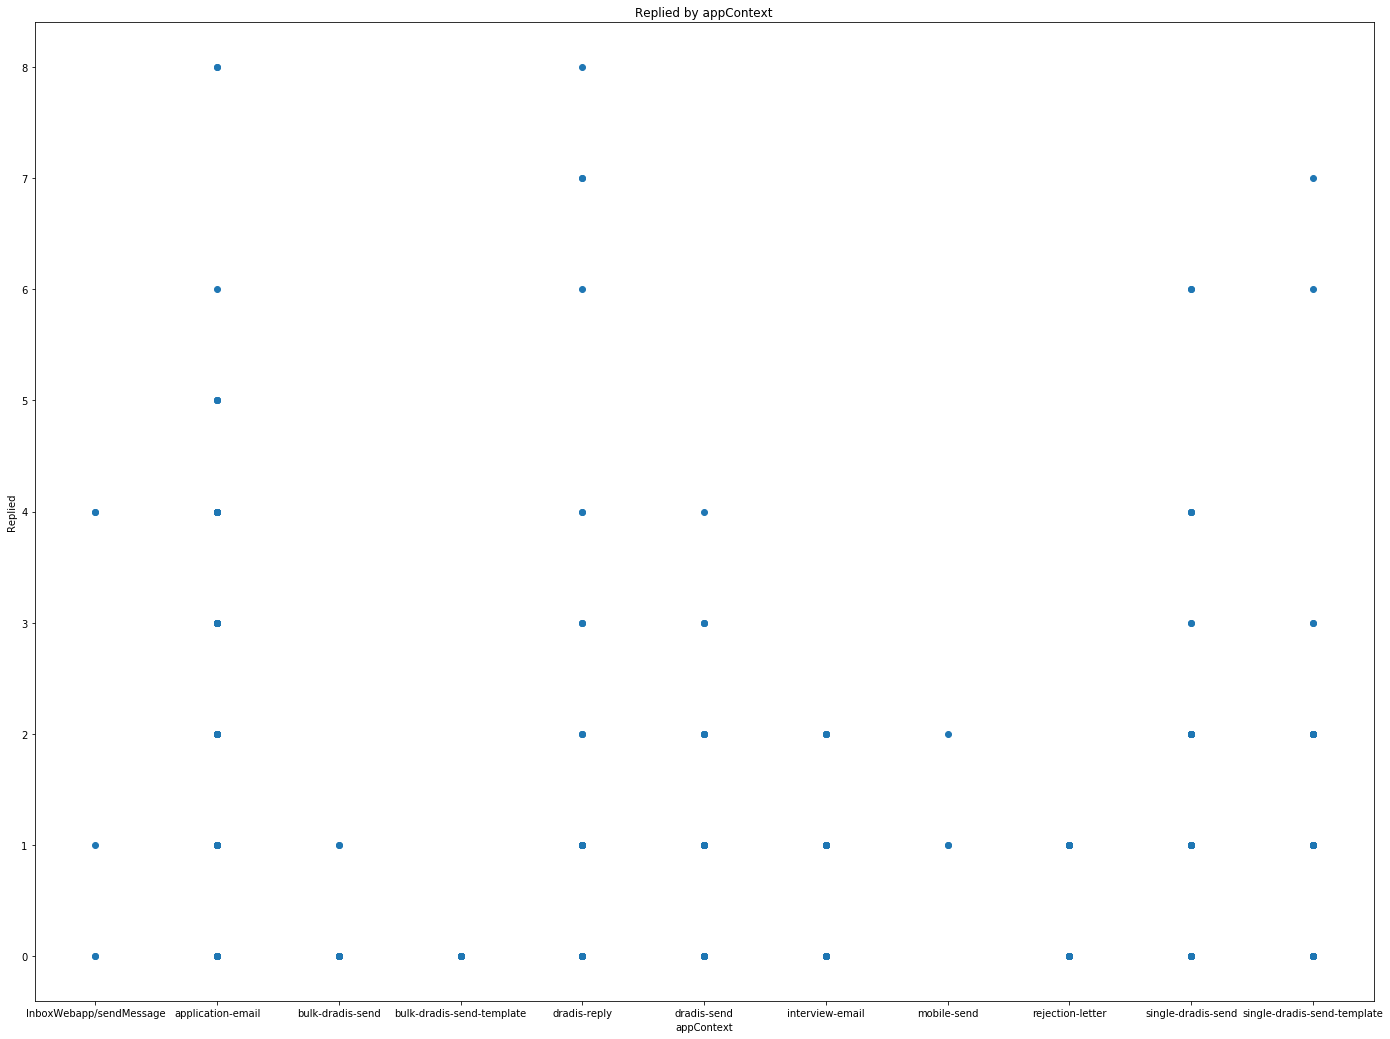

In [130]:
matplotlib.rcParams.update({'font.size': 10})
appContextplt = plt.scatter(iris3.appContext, iris3.replied)
plt.xlabel("appContext")
plt.ylabel("Replied")
plt.title("Replied by appContext")

Text(0.5,1,'Replied by appContext')

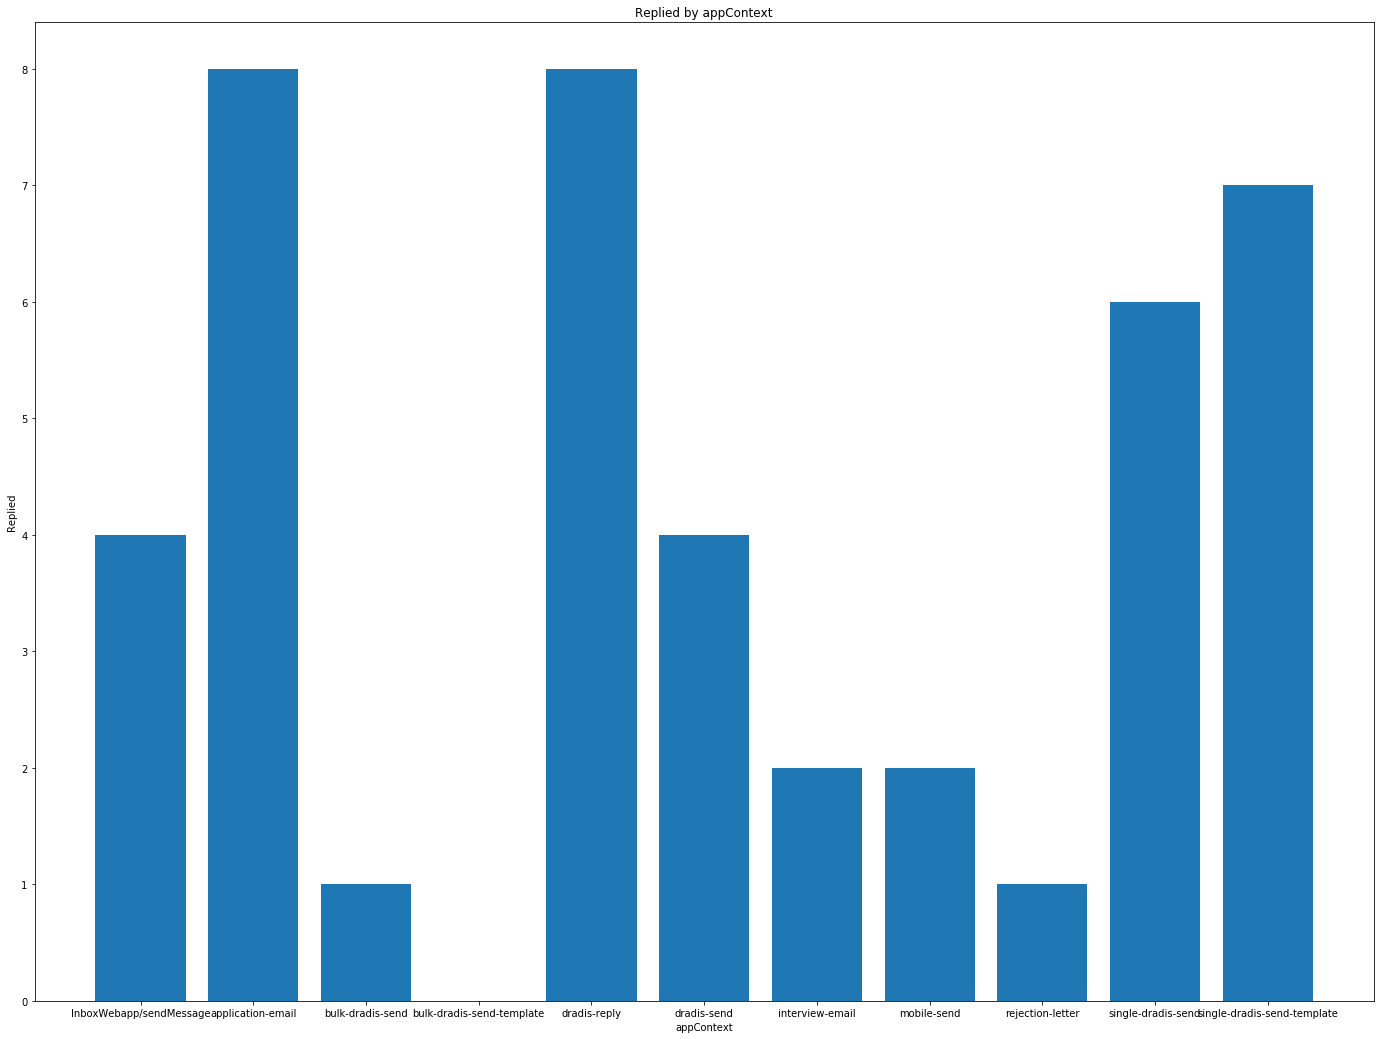

In [131]:
matplotlib.rcParams.update({'font.size': 10})
appContextplt = plt.bar(iris3.appContext, iris3.replied)
plt.xlabel("appContext")
plt.ylabel("Replied")
plt.title("Replied by appContext")

Text(0.5,1,'Replied by appContext')

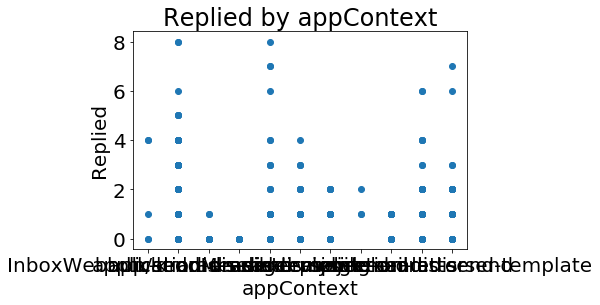

In [110]:
matplotlib.rcParams.update({'font.size': 20})
plt.scatter(iris3.appContext, iris3.replied)
plt.xlabel("appContext")
plt.ylabel("Replied")
plt.title("Replied by appContext")

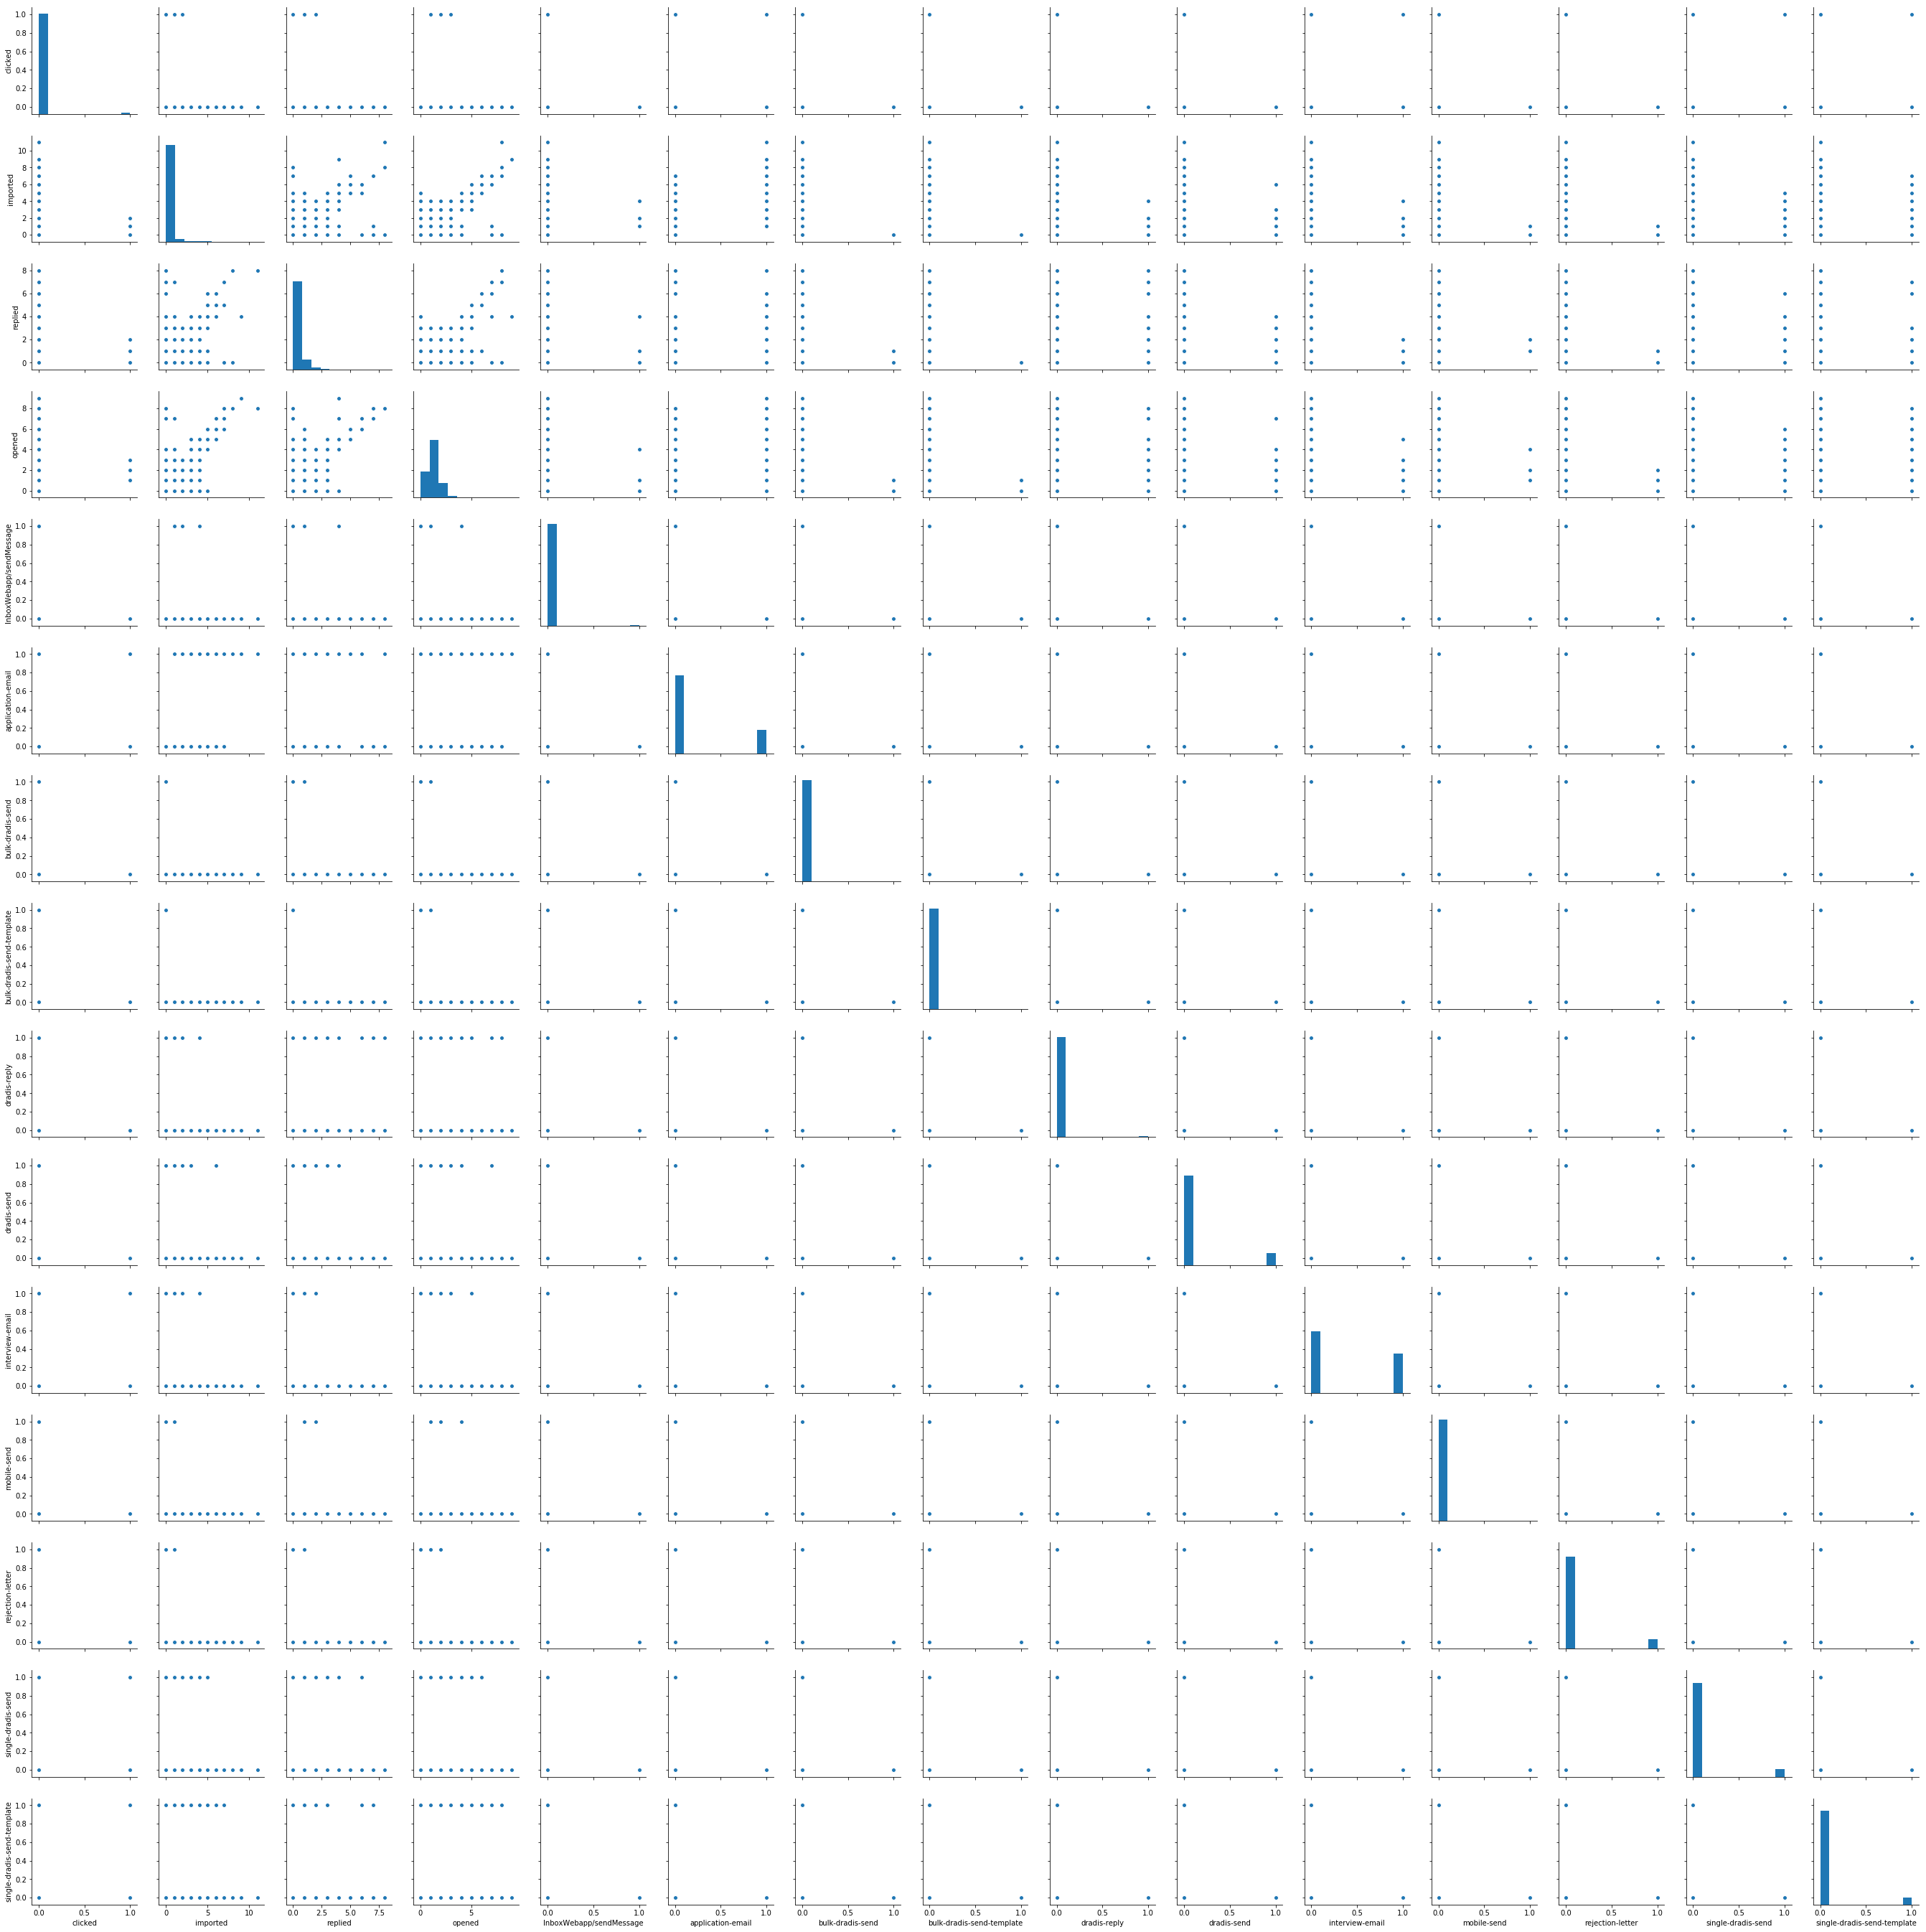

In [82]:
#Pair plot
X = iris_trim[['clicked', 'imported', 'replied', 'opened', 'InboxWebapp/sendMessage', 'application-email', 'bulk-dradis-send', 'bulk-dradis-send-template', 'dradis-reply', 'dradis-send', 'interview-email', 'mobile-send', 'rejection-letter', 'single-dradis-send', 'single-dradis-send-template']]
sb.pairplot(X)
plt.show()
#Imported, replied, opened have some stuff going on 

In [83]:
y = iris_trim.replied
X = iris_trim.drop(['replied'], axis=1)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                replied   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     393.6
Date:                Tue, 19 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:47:20   Log-Likelihood:                -2726.9
No. Observations:                4851   AIC:                             5482.
Df Residuals:                    4837   BIC:                             5573.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
clicked                        -0.0951      0.065     -1.469      0.142      -0.222       0.032
imported                        0.5617      0.014     39.607      0.000       0.534       0.590
opened                          0.1370      0.009     14.462      0.000       0.118       0.156
InboxWebapp/sendMessage         0.2875      0.192      1.496      0.135      -0.089       0.664
application-email              -0.5654      0.019    -29.527      0.000      -0.603      -0.528
bulk-dradis-send                0.0744      0.114      0.654      0.513      -0.149       0.297
bulk-dradis-send-template      -0.0937      0.098     -0.959      0.338      -0.285       0.098
dradis-reply                    0.7238      0.056     12.820      0.000       0.613       0.834
dradis-send                    -0.0044      0.019     -0.234      0.815      -0.041       0.032
interview-email                -0.1011      0.014     -7.316      0.000      -0.128      -0.074
mobile-send                     0.6393      0.246      2.598      0.009       0.157       1.122
rejection-letter               -0.0704      0.021     -3.367      0.001      -0.111      -0.029
single-dradis-send              0.2326      0.023      9.913      0.000       0.187       0.279
single-dradis-send-template     0.1204      0.024      4.960      0.000       0.073       0.168
==============================================================================
Omnibus:                     2333.836   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236868.558
Skew:                           1.348   Prob(JB):                         0.00
Kurtosis:                      37.127   Cond. No.                         58.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
print(results.params)

clicked                       -0.095149
imported                       0.561740
opened                         0.136956
InboxWebapp/sendMessage        0.287477
application-email             -0.565406
bulk-dradis-send               0.074379
bulk-dradis-send-template     -0.093707
dradis-reply                   0.723768
dradis-send                   -0.004400
interview-email               -0.101106
mobile-send                    0.639276
rejection-letter              -0.070361
single-dradis-send             0.232626
single-dradis-send-template    0.120390
dtype: float64


In [85]:
print(results)

In [86]:
print(results.HC1_se)

clicked                        0.042501
imported                       0.058270
opened                         0.033432
InboxWebapp/sendMessage        0.467480
application-email              0.056097
bulk-dradis-send               0.089219
bulk-dradis-send-template      0.027170
dradis-reply                   0.168009
dradis-send                    0.024848
interview-email                0.034601
mobile-send                    0.205887
rejection-letter               0.023842
single-dradis-send             0.039831
single-dradis-send-template    0.038744
dtype: float64


In [87]:
print(results.pvalues)

clicked                         1.417812e-01
imported                       2.152941e-297
opened                          1.931829e-46
InboxWebapp/sendMessage         1.348404e-01
application-email              2.539078e-176
bulk-dradis-send                5.131009e-01
bulk-dradis-send-template       3.377660e-01
dradis-reply                    5.021099e-37
dradis-send                     8.146857e-01
interview-email                 2.985446e-13
mobile-send                     9.412441e-03
rejection-letter                7.664502e-04
single-dradis-send              6.056605e-23
single-dradis-send-template     7.306980e-07
dtype: float64


In [88]:
est2 = results.conf_int(alpha=0.05, cols=None)

In [89]:
print(est2)

                                    0         1
clicked                     -0.222093  0.031795
imported                     0.533935  0.589545
opened                       0.118391  0.155522
InboxWebapp/sendMessage     -0.089369  0.664323
application-email           -0.602946 -0.527865
bulk-dradis-send            -0.148560  0.297318
bulk-dradis-send-template   -0.285332  0.097918
dradis-reply                 0.613092  0.834445
dradis-send                 -0.041198  0.032399
interview-email             -0.128201 -0.074011
mobile-send                  0.156829  1.121723
rejection-letter            -0.111332 -0.029390
single-dradis-send           0.186619  0.278632
single-dradis-send-template  0.072801  0.167978


AttributeError: 'tuple' object has no attribute 'bar'

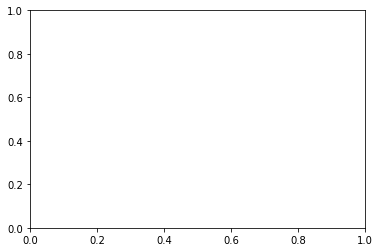

In [78]:
barplot(x_data = iris_trim.replied
        , y_data = results.params
        , error_data = results.HC1_se
        , x_label = 'Variables'
        , y_label = 'Association with "Replied" '
        , title = 'Regression Results')

In [43]:
y = iris_trim.opened
X = iris_trim.drop(['opened'], axis=1)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 opened   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     294.1
Date:                Mon, 18 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:49:45   Log-Likelihood:                -4650.0
No. Observations:                4851   AIC:                             9328.
Df Residuals:                    4837   BIC:                             9419.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
clicked                         0.4571      0.096      4.759      0.000       0.269       0.645
imported                        0.7283      0.022     33.277      0.000       0.685       0.771
replied                         0.3026      0.021     14.462      0.000       0.262       0.344
InboxWebapp/sendMessage        -1.0927      0.285     -3.829      0.000      -1.652      -0.533
application-email               0.0038      0.031      0.123      0.902      -0.057       0.064
bulk-dradis-send                0.4568      0.169      2.704      0.007       0.126       0.788
bulk-dradis-send-template       0.6842      0.145      4.719      0.000       0.400       0.968
dradis-reply                    1.0901      0.084     12.995      0.000       0.926       1.255
dradis-send                     0.5877      0.027     22.100      0.000       0.536       0.640
interview-email                 1.0143      0.015     69.320      0.000       0.986       1.043
mobile-send                     1.4443      0.365      3.952      0.000       0.728       2.161
rejection-letter                0.6716      0.030     22.717      0.000       0.614       0.730
single-dradis-send              0.7316      0.034     21.754      0.000       0.666       0.798
single-dradis-send-template     0.7293      0.035     21.064      0.000       0.661       0.797
==============================================================================
Omnibus:                      334.753   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1568.861
Skew:                          -0.130   Prob(JB):                         0.00
Kurtosis:                       5.774   Cond. No.                         40.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
y = iris_trim.clicked
X = iris_trim.drop(['clicked'], axis=1)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                clicked   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.453
Date:                Mon, 18 Jun 2018   Prob (F-statistic):           1.40e-07
Time:                        14:50:16   Log-Likelihood:                 4574.2
No. Observations:                4851   AIC:                            -9120.
Df Residuals:                    4837   BIC:                            -9030.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
imported                       -0.0072      0.004     -1.976      0.048      -0.014    -5.6e-05
replied                        -0.0047      0.003     -1.469      0.142      -0.011       0.002
opened                          0.0102      0.002      4.759      0.000       0.006       0.014
InboxWebapp/sendMessage         0.0134      0.043      0.314      0.754      -0.070       0.097
application-email               0.0019      0.005      0.408      0.683      -0.007       0.011
bulk-dradis-send               -0.0044      0.025     -0.175      0.861      -0.054       0.045
bulk-dradis-send-template      -0.0070      0.022     -0.321      0.748      -0.050       0.036
dradis-reply                   -0.0094      0.013     -0.741      0.459      -0.034       0.016
dradis-send                    -0.0058      0.004     -1.394      0.163      -0.014       0.002
interview-email                 0.0065      0.003      2.120      0.034       0.000       0.013
mobile-send                    -0.0128      0.055     -0.233      0.815      -0.120       0.094
rejection-letter               -0.0068      0.005     -1.466      0.143      -0.016       0.002
single-dradis-send              0.0012      0.005      0.236      0.813      -0.009       0.012
single-dradis-send-template     0.0133      0.005      2.460      0.014       0.003       0.024
==============================================================================
Omnibus:                     7541.703   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2217818.535
Skew:                          10.172   Prob(JB):                         0.00
Kurtosis:                     105.755   Cond. No.                         60.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
iris_trim.describe()

,clicked,imported,replied,opened,InboxWebapp/sendMessage,application-email,bulk-dradis-send,bulk-dradis-send-template,dradis-reply,dradis-send,interview-email,mobile-send,rejection-letter,single-dradis-send,single-dradis-send-template
count,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000
mean,0.009070,0.345083,0.185529,0.966605,0.001031,0.228613,0.002886,0.003917,0.012369,0.117089,0.390641,0.000618,0.094207,0.077304,0.071325
std,0.094815,0.759317,0.609043,0.844459,0.032092,0.419982,0.053649,0.062467,0.110536,0.321560,0.487944,0.024863,0.292147,0.267100,0.257394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,11.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
iris_bin = iris_trim

In [53]:
iris_bin.loc[iris_bin.anyreply == np.where(iris_trim.replied !=0, 1, 0)]
#The right way to do this!

,clicked,imported,replied,opened,InboxWebapp/sendMessage,application-email,bulk-dradis-send,bulk-dradis-send-template,dradis-reply,dradis-send,interview-email,mobile-send,rejection-letter,single-dradis-send,single-dradis-send-template,anyreply
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,4,4,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,4,4,4,1,0,0,0,0,0,0,0,0,0,0,1
5,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,5,0,5,0,1,0,0,0,0,0,0,0,0,0,0
8,0,3,1,3,0,1,0,0,0,0,0,0,0,0,0,1
9,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [57]:
#iris_bin['anyimport'] = iris_bin['imported']
iris_bin.loc[iris_bin.anyimport == np.where(iris_trim.imported !=0, 1, 0)]
#The right way to do this!

,clicked,imported,replied,opened,InboxWebapp/sendMessage,application-email,bulk-dradis-send,bulk-dradis-send-template,dradis-reply,dradis-send,interview-email,mobile-send,rejection-letter,single-dradis-send,single-dradis-send-template,anyreply,anyimport
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
5,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
10,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
13,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
14,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
15,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [58]:
iris_bin_trim = iris_bin[['clicked', 'imported', 'anyreply', 'opened', 'InboxWebapp/sendMessage', 'application-email', 'bulk-dradis-send', 'bulk-dradis-send-template', 'dradis-reply', 'dradis-send', 'interview-email', 'mobile-send', 'rejection-letter', 'single-dradis-send', 'single-dradis-send-template']]

In [59]:
iris_bin_trim.head(20)

,clicked,imported,anyreply,opened,InboxWebapp/sendMessage,application-email,bulk-dradis-send,bulk-dradis-send-template,dradis-reply,dradis-send,interview-email,mobile-send,rejection-letter,single-dradis-send,single-dradis-send-template
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,4,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,4,1,4,1,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,5,0,5,0,1,0,0,0,0,0,0,0,0,0
8,0,3,1,3,0,1,0,0,0,0,0,0,0,0,0
9,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0


In [62]:
y = iris_bin_trim.anyreply
X = iris_bin_trim.drop(['anyreply'], axis=1)

In [63]:
logit = sm.Logit(y, X)
result = logit.fit()
print(result.summary())

         Current function value: 0.279852
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               anyreply   No. Observations:                 4851
Model:                          Logit   Df Residuals:                     4837
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Jun 2018   Pseudo R-squ.:                  0.2730
Time:                        15:29:49   Log-Likelihood:                -1357.6
converged:                      False   LL-Null:                       -1867.4
                                        LLR p-value:                9.875e-210
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
clicked                        -0.8046      0.653     -1.232      0.218      -2.084       0.475
imported      

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [64]:
def barplot(x_data, y_data, error_data, x_label, y_label, title):
    ax = plt.subplots()
    ax.bar(x_data, y_data, color='#539caf', align='center')
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)